# Problem Statement

Our client (FinMan Company) wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. A policy is recommended to a person when they land on their website, and if the person chooses to fill up a form to apply it is considered as a Positive outcome (Classified as lead). All other conditions are considered Zero outcomes.

# Data Description:-

We have the following information regarding the potential-customer and the insurance at any given point in time:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

Variable	Definition

`ID Unique`	                  Identifier for a row
`City_Code`	                  Code for the City of the customers
`Region_Code`	              Code for the Region of the customers
`Accomodation_Type`	Customer Owns or Rents the house
`Reco_Insurance_Type`	Joint or Individual type for the recommended insurance
`Upper_Age`	Maximum age of the customer
`Lower_Age`	Minimum age of the customer
`Is_Spouse`	If the customers are married to each other (in case of joint insurance)
`Health_Indicator`	Encoded values for health of the customer
`Holding_Policy_Duration`	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
`Holding_Policy_Type`	Type of holding policy
`Reco_Policy_Cat`	Encoded value for recommended health insurance
`Reco_Policy_Premium` Annual	Premium (INR) for the recommended health insurance
`Response` (Target)	0 : Customer did not show interest in the recommended policy,
1 : Customer showed interest in the recommended policy

# Expected Outcome:

Build a model to predict whether the person will be interested in their proposed Health plan/policy given the information above.
Grading Metric: ROC_AUC_SCORE


# Problem Category:-

For the data and objective its is evident that this is a Binary Classification Problem in the Tabular Data format.

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/home/scypyuser/Downloads/AV/train.csv")

In [6]:
df.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [7]:
df.shape

(50882, 14)

In [8]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [9]:
df.describe()

ID   Region_Code     Upper_Age     Lower_Age  \
count  50882.000000  50882.000000  50882.000000  50882.000000   
mean   25441.500000   1732.788707     44.856275     42.738866   
std    14688.512535   1424.081652     17.310271     17.319375   
min        1.000000      1.000000     18.000000     16.000000   
25%    12721.250000    523.000000     28.000000     27.000000   
50%    25441.500000   1391.000000     44.000000     40.000000   
75%    38161.750000   2667.000000     59.000000     57.000000   
max    50882.000000   6194.000000     75.000000     75.000000   

       Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium      Response  
count         30631.000000     50882.000000         50882.000000  50882.000000  
mean              2.439228        15.115188         14183.950069      0.239947  
std               1.025923         6.340663          6590.074873      0.427055  
min               1.000000         1.000000          2280.000000      0.000000  
25%               1.000000        12.000000          9248.000000      0.000000  
50%               3.000000        17.000000         13178.000000      0.000000  
75%               3.000000        20.000000         18096.000000      0.000000  
max               4.000000        22.000000         43350.400000      1.000000

# Handling Missing Values

In [10]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
df.select_dtypes(include='O').head()

City_Code Accomodation_Type Reco_Insurance_Type Is_Spouse Health Indicator  \
0        C3            Rented          Individual        No               X1   
1        C5             Owned               Joint        No               X2   
2        C5             Owned          Individual        No              NaN   
3       C24             Owned               Joint        No               X1   
4        C8            Rented          Individual        No               X2   

  Holding_Policy_Duration  
0                     14+  
1                     NaN  
2                     1.0  
3                     14+  
4                     3.0

In [12]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [13]:
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],inplace = True)

In [14]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].median(),inplace = True)

In [15]:
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],inplace = True)

In [16]:
df.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

# Visualization of Data

In [17]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

# Univariate Analysis

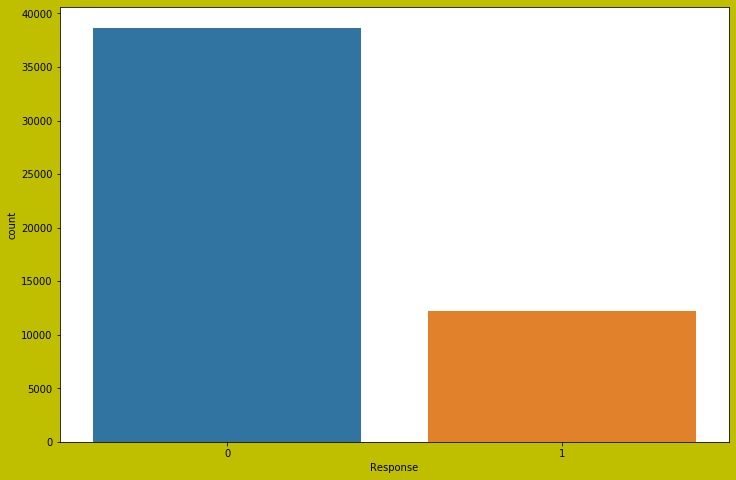

In [18]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Response']);

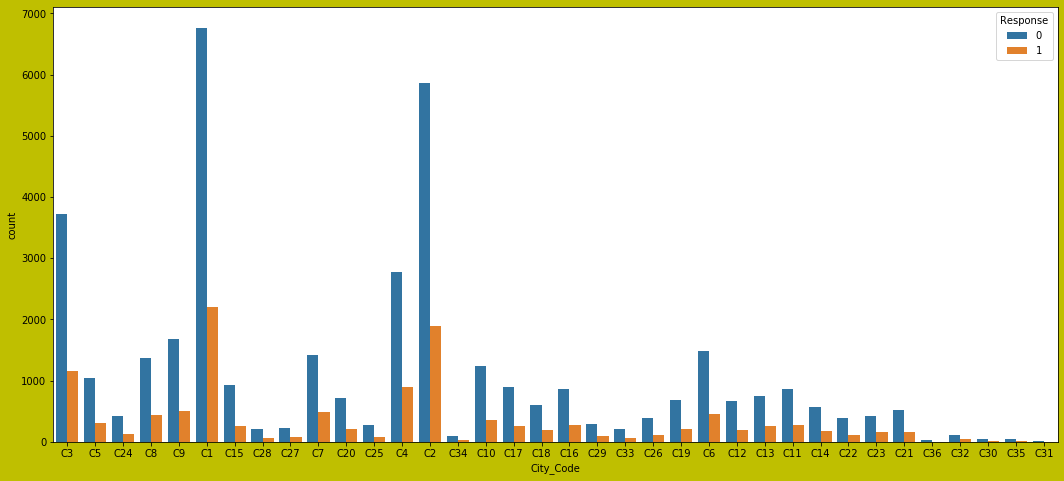

In [19]:
plt.figure(figsize=(18,8),facecolor='y')
sns.countplot(df['City_Code'],orient= "v",hue= df['Response']);

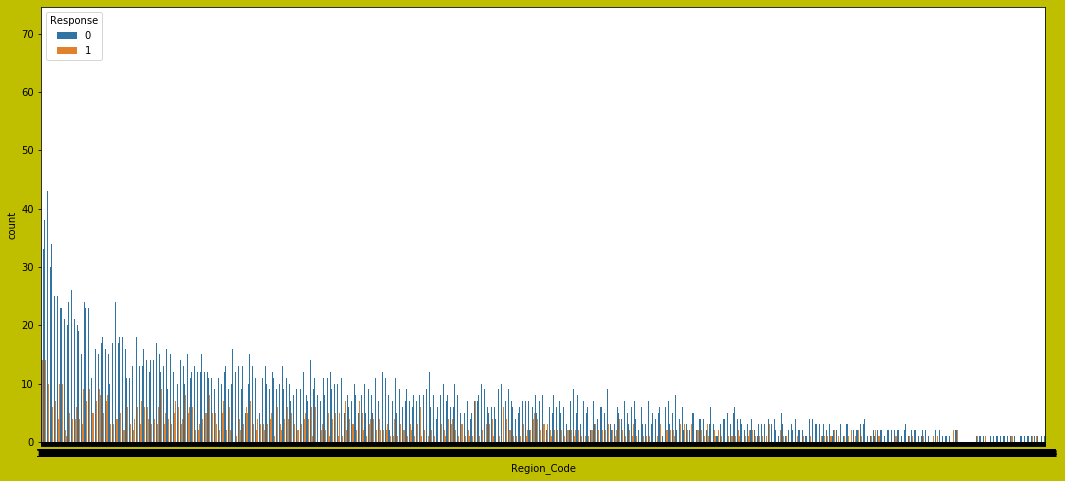

In [20]:
plt.figure(figsize=(18,8),facecolor='y')
sns.countplot(df['Region_Code'],orient= "v",hue= df['Response']);

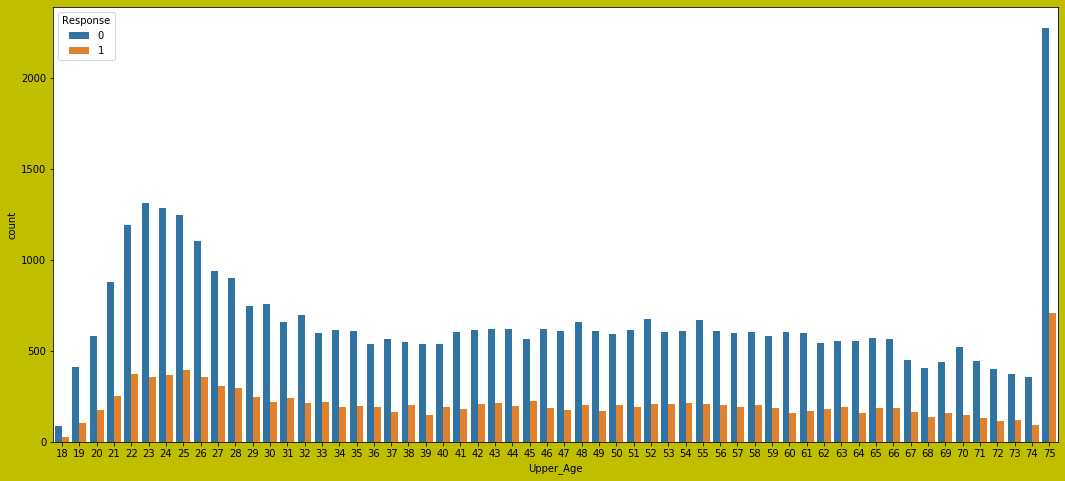

In [21]:
plt.figure(figsize=(18,8),facecolor='y')
sns.countplot(df['Upper_Age'],orient= "v",hue= df['Response']);

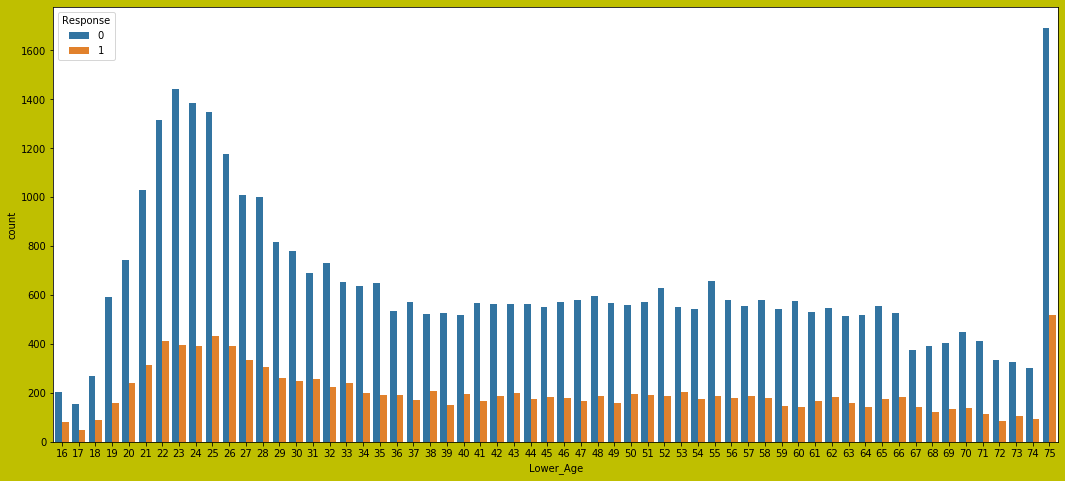

In [22]:
plt.figure(figsize=(18,8),facecolor='y')
sns.countplot(df['Lower_Age'],orient= "v",hue= df['Response']);

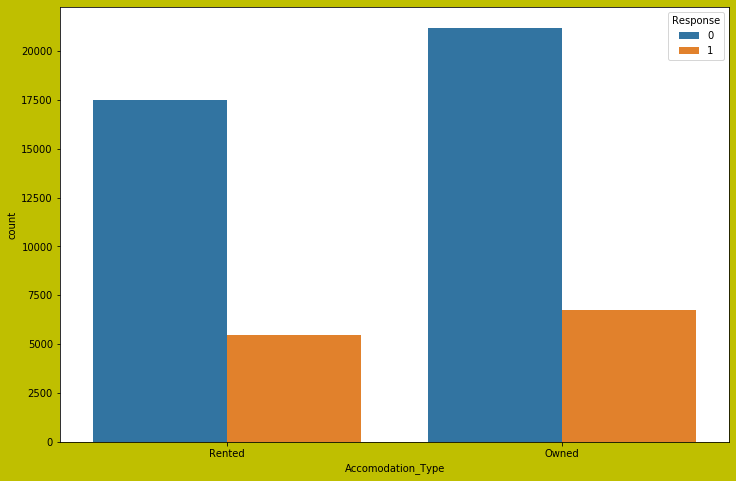

In [23]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Accomodation_Type'],orient= "v",hue= df['Response']);

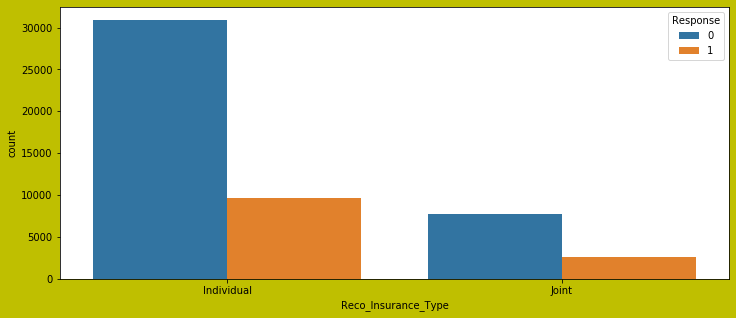

In [24]:
plt.figure(figsize=(12,5),facecolor='y')
sns.countplot(df['Reco_Insurance_Type'],orient= "v",hue= df['Response']);

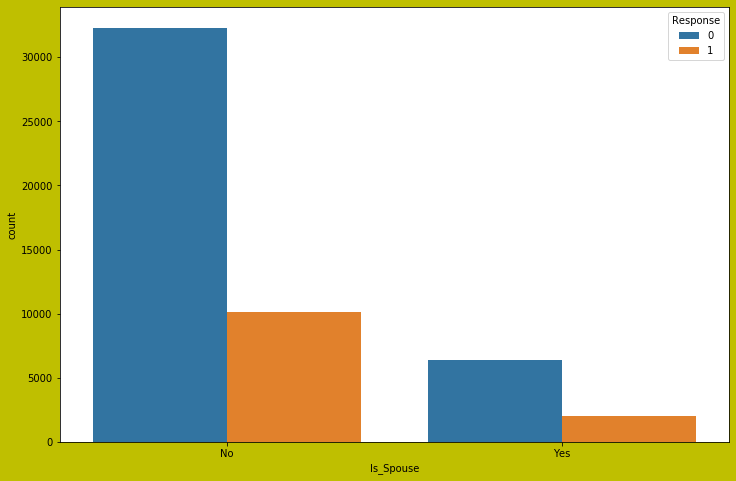

In [25]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Is_Spouse'],orient= "v",hue= df['Response']);

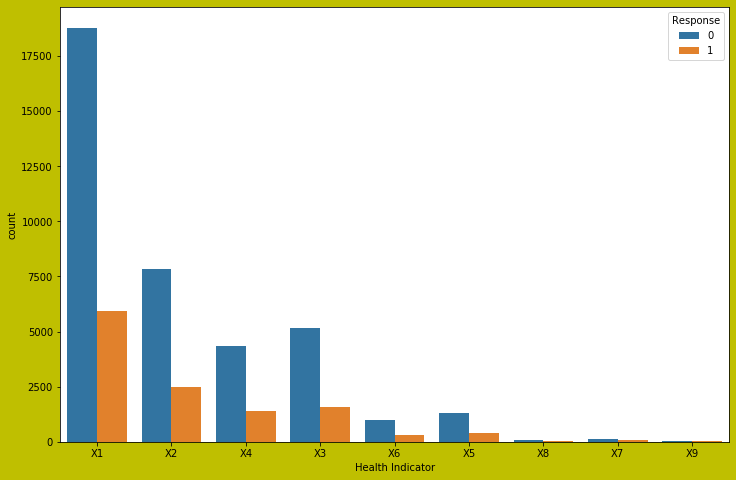

In [26]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Health Indicator'],orient= "v",hue= df['Response']);

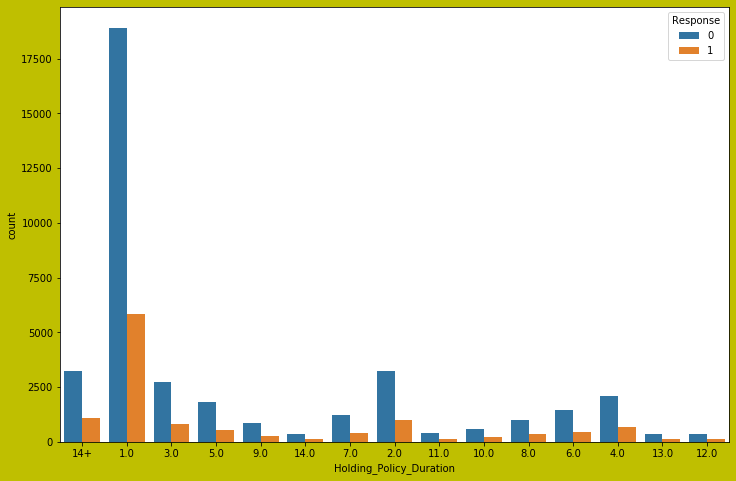

In [27]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Holding_Policy_Duration'],orient= "v",hue= df['Response']);

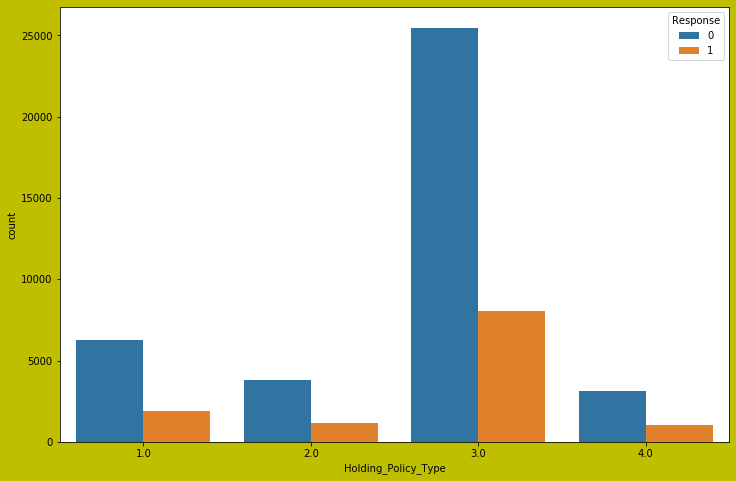

In [28]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Holding_Policy_Type'],orient= "v",hue= df['Response']);

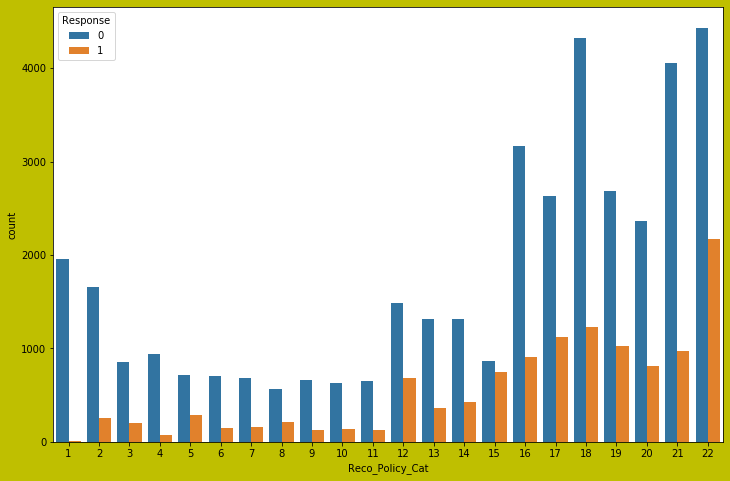

In [29]:
plt.figure(figsize=(12,8),facecolor='y')
sns.countplot(df['Reco_Policy_Cat'],orient= "v",hue= df['Response']);

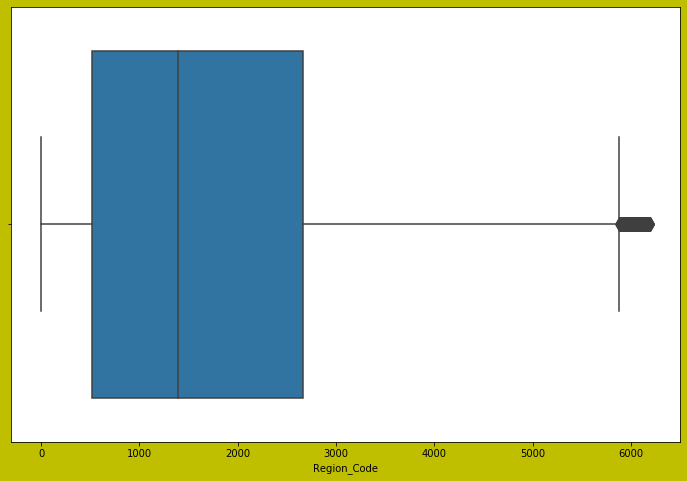

In [30]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Region_Code'],fliersize=10);

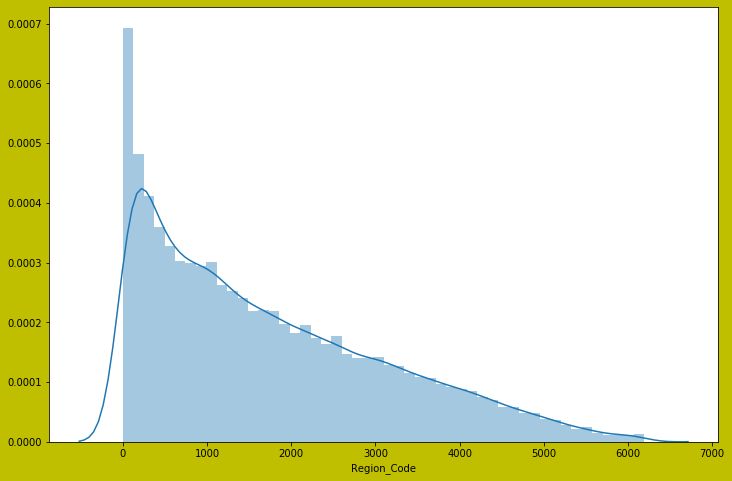

In [31]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Region_Code']);

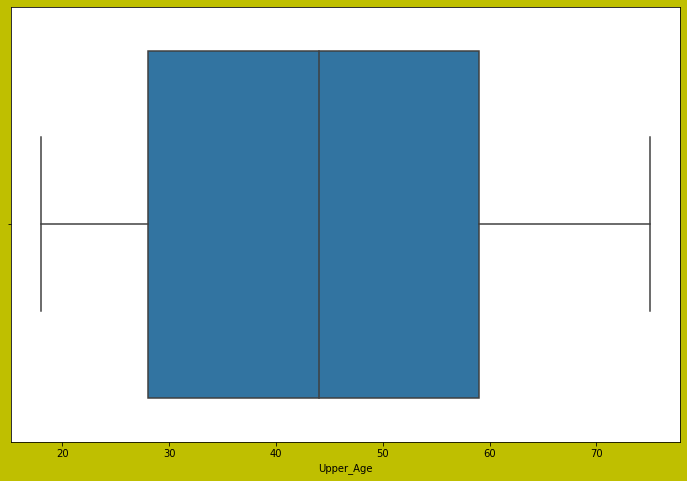

In [32]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Upper_Age'],fliersize=5);

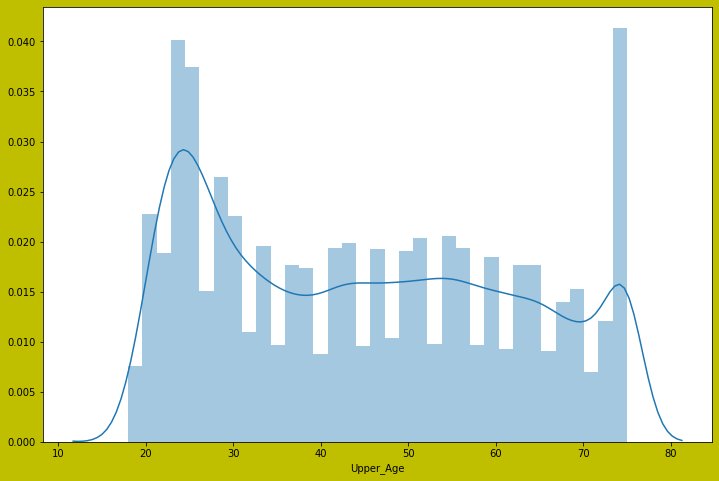

In [33]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Upper_Age']);

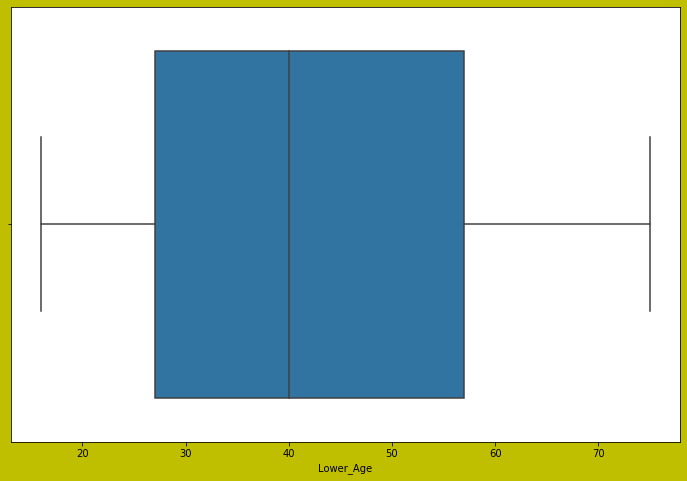

In [34]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Lower_Age'],fliersize=5);

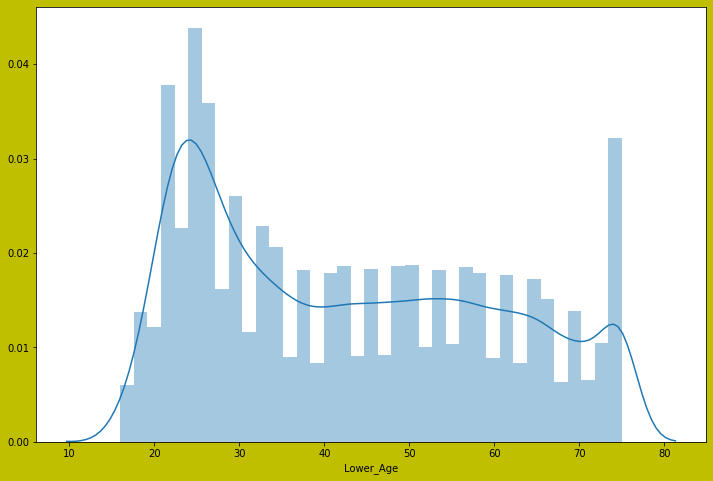

In [35]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Lower_Age']);

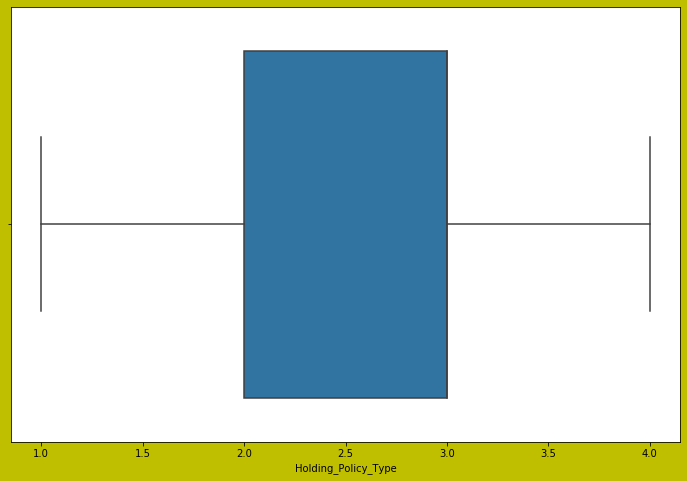

In [36]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Holding_Policy_Type'],fliersize=5);

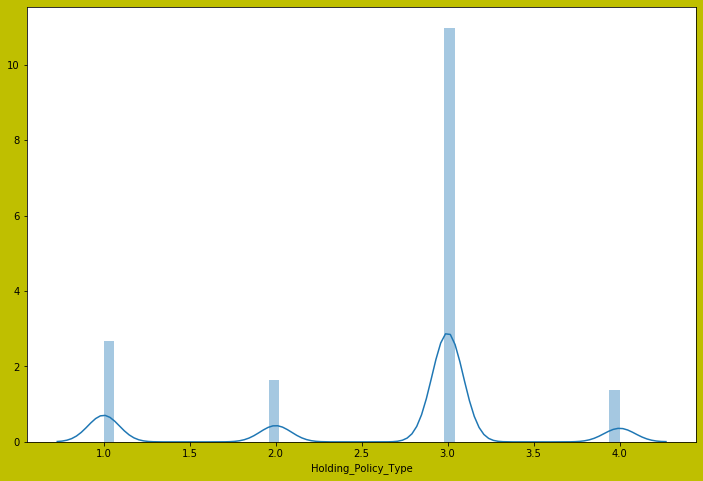

In [37]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Holding_Policy_Type']);

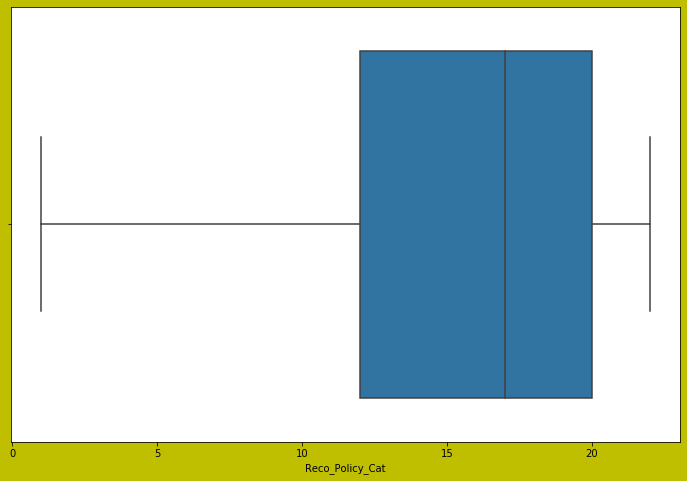

In [38]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Reco_Policy_Cat'],fliersize=5);

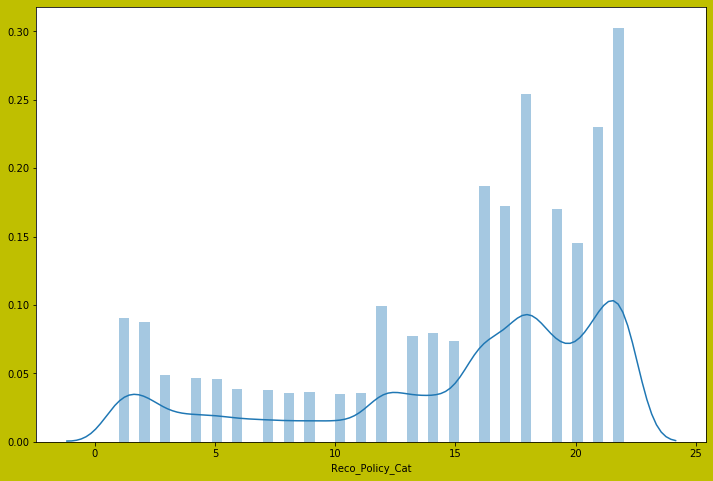

In [39]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Reco_Policy_Cat']);

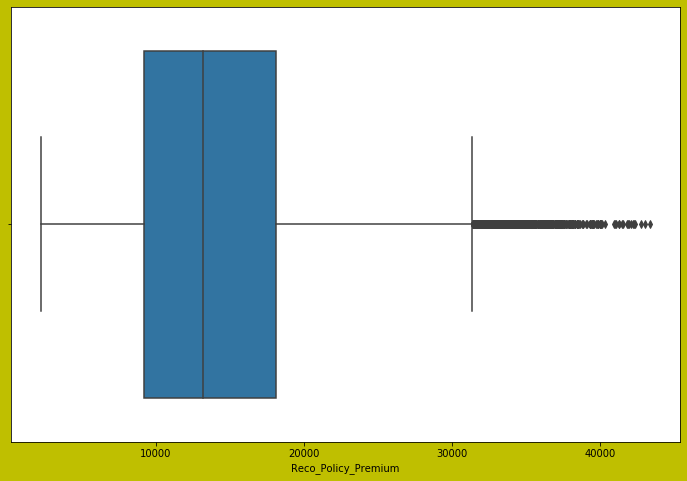

In [40]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Reco_Policy_Premium'],fliersize=5)

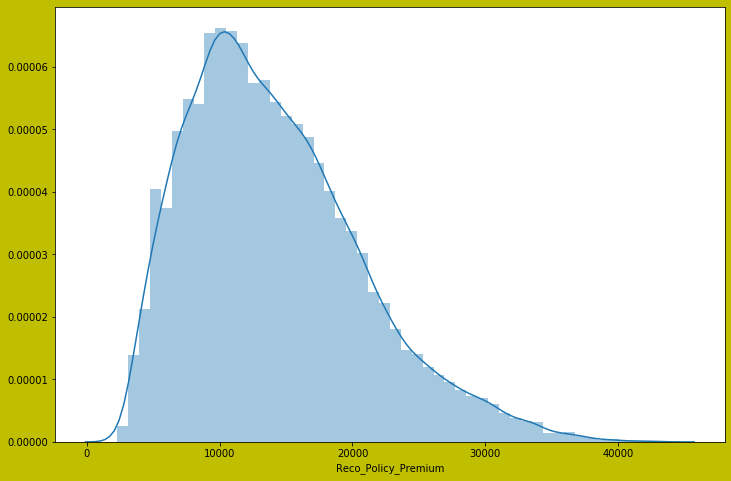

In [41]:
plt.figure(figsize=(12,8),facecolor='y')
sns.distplot(df['Reco_Policy_Premium']);

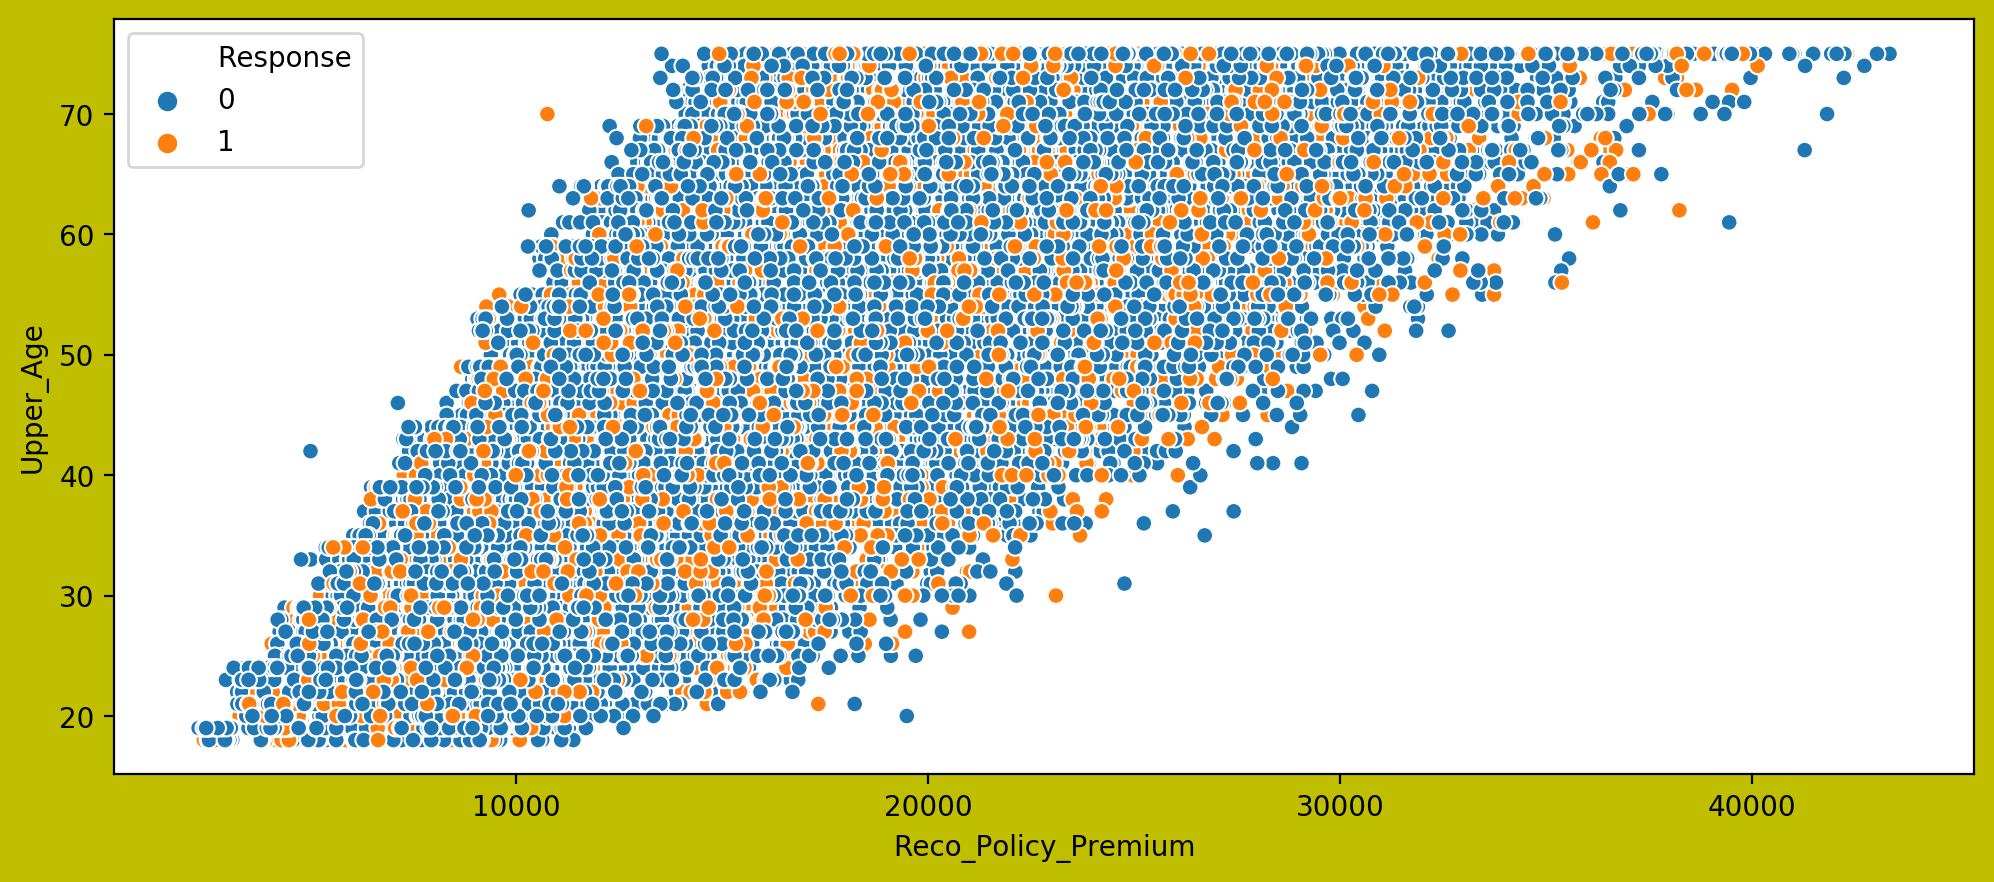

In [42]:
plt.figure(figsize=(12,5),dpi=200,facecolor='y')
sns.scatterplot(df['Reco_Policy_Premium'],df['Upper_Age'],hue=df['Response']);

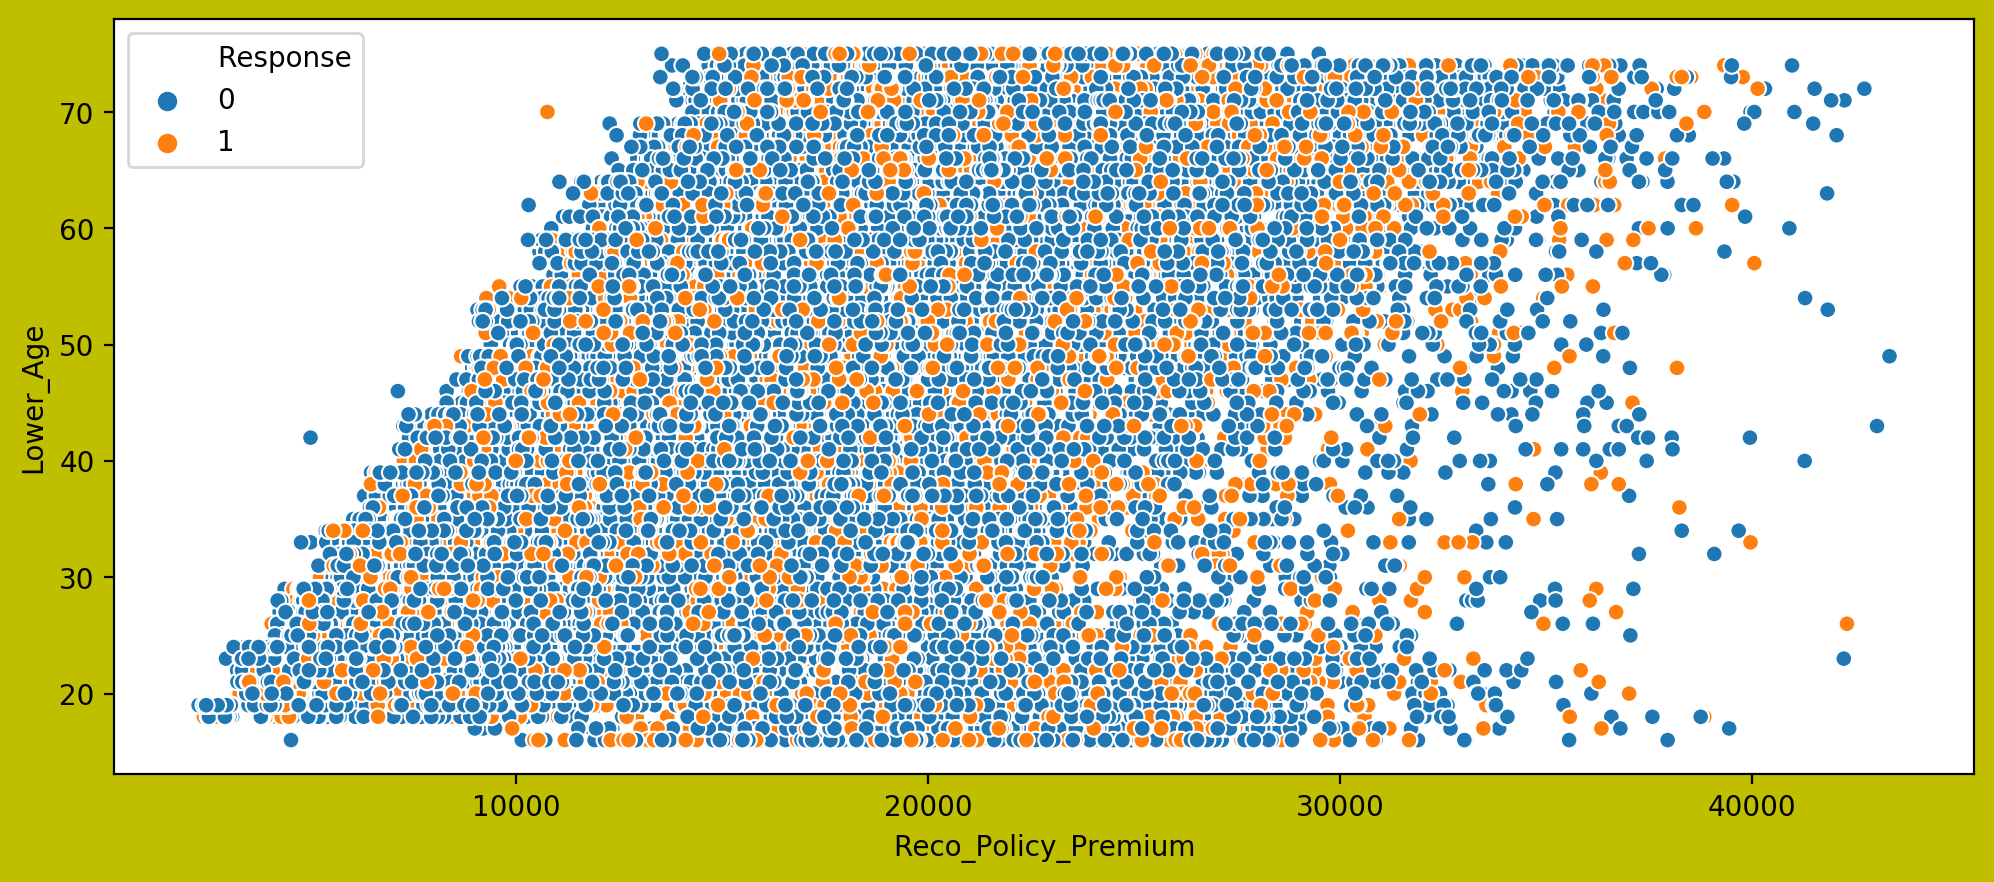

In [43]:
plt.figure(figsize=(12,5),dpi=200,facecolor='y')
sns.scatterplot(df['Reco_Policy_Premium'],df['Lower_Age'],hue=df['Response']);

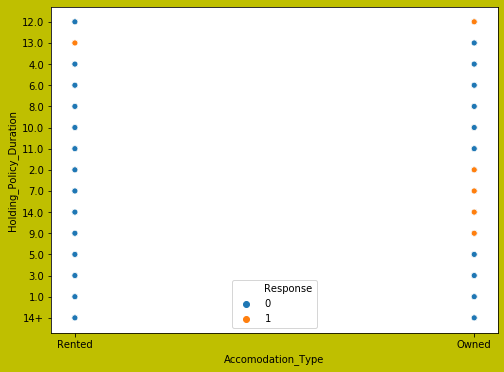

In [44]:
plt.figure(figsize=(8,6),facecolor='y')
sns.scatterplot(df['Accomodation_Type'],df['Holding_Policy_Duration'],hue=df['Response']);

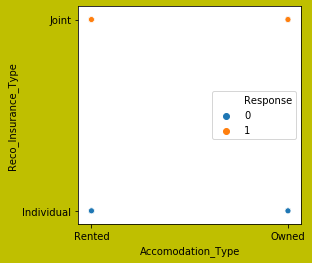

In [45]:
plt.figure(figsize=(4,4),facecolor='y')
sns.scatterplot(df['Accomodation_Type'],df['Reco_Insurance_Type'],hue=df['Response']);

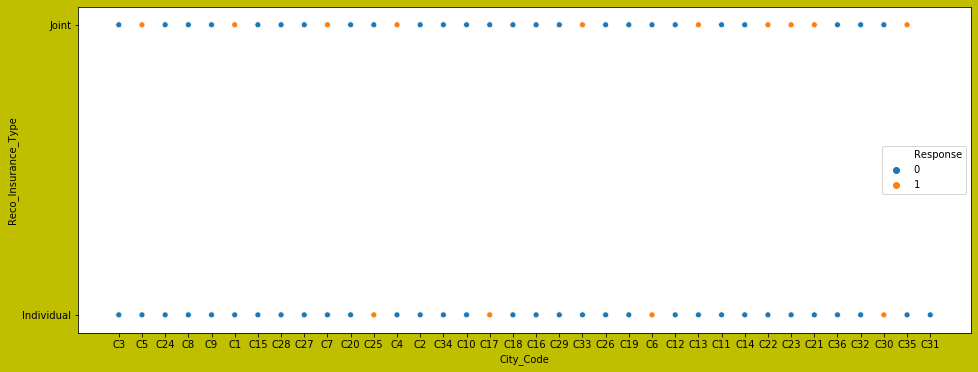

In [46]:
plt.figure(figsize=(16,6),facecolor='y')
sns.scatterplot(df['City_Code'],df['Reco_Insurance_Type'],hue=df['Response']);

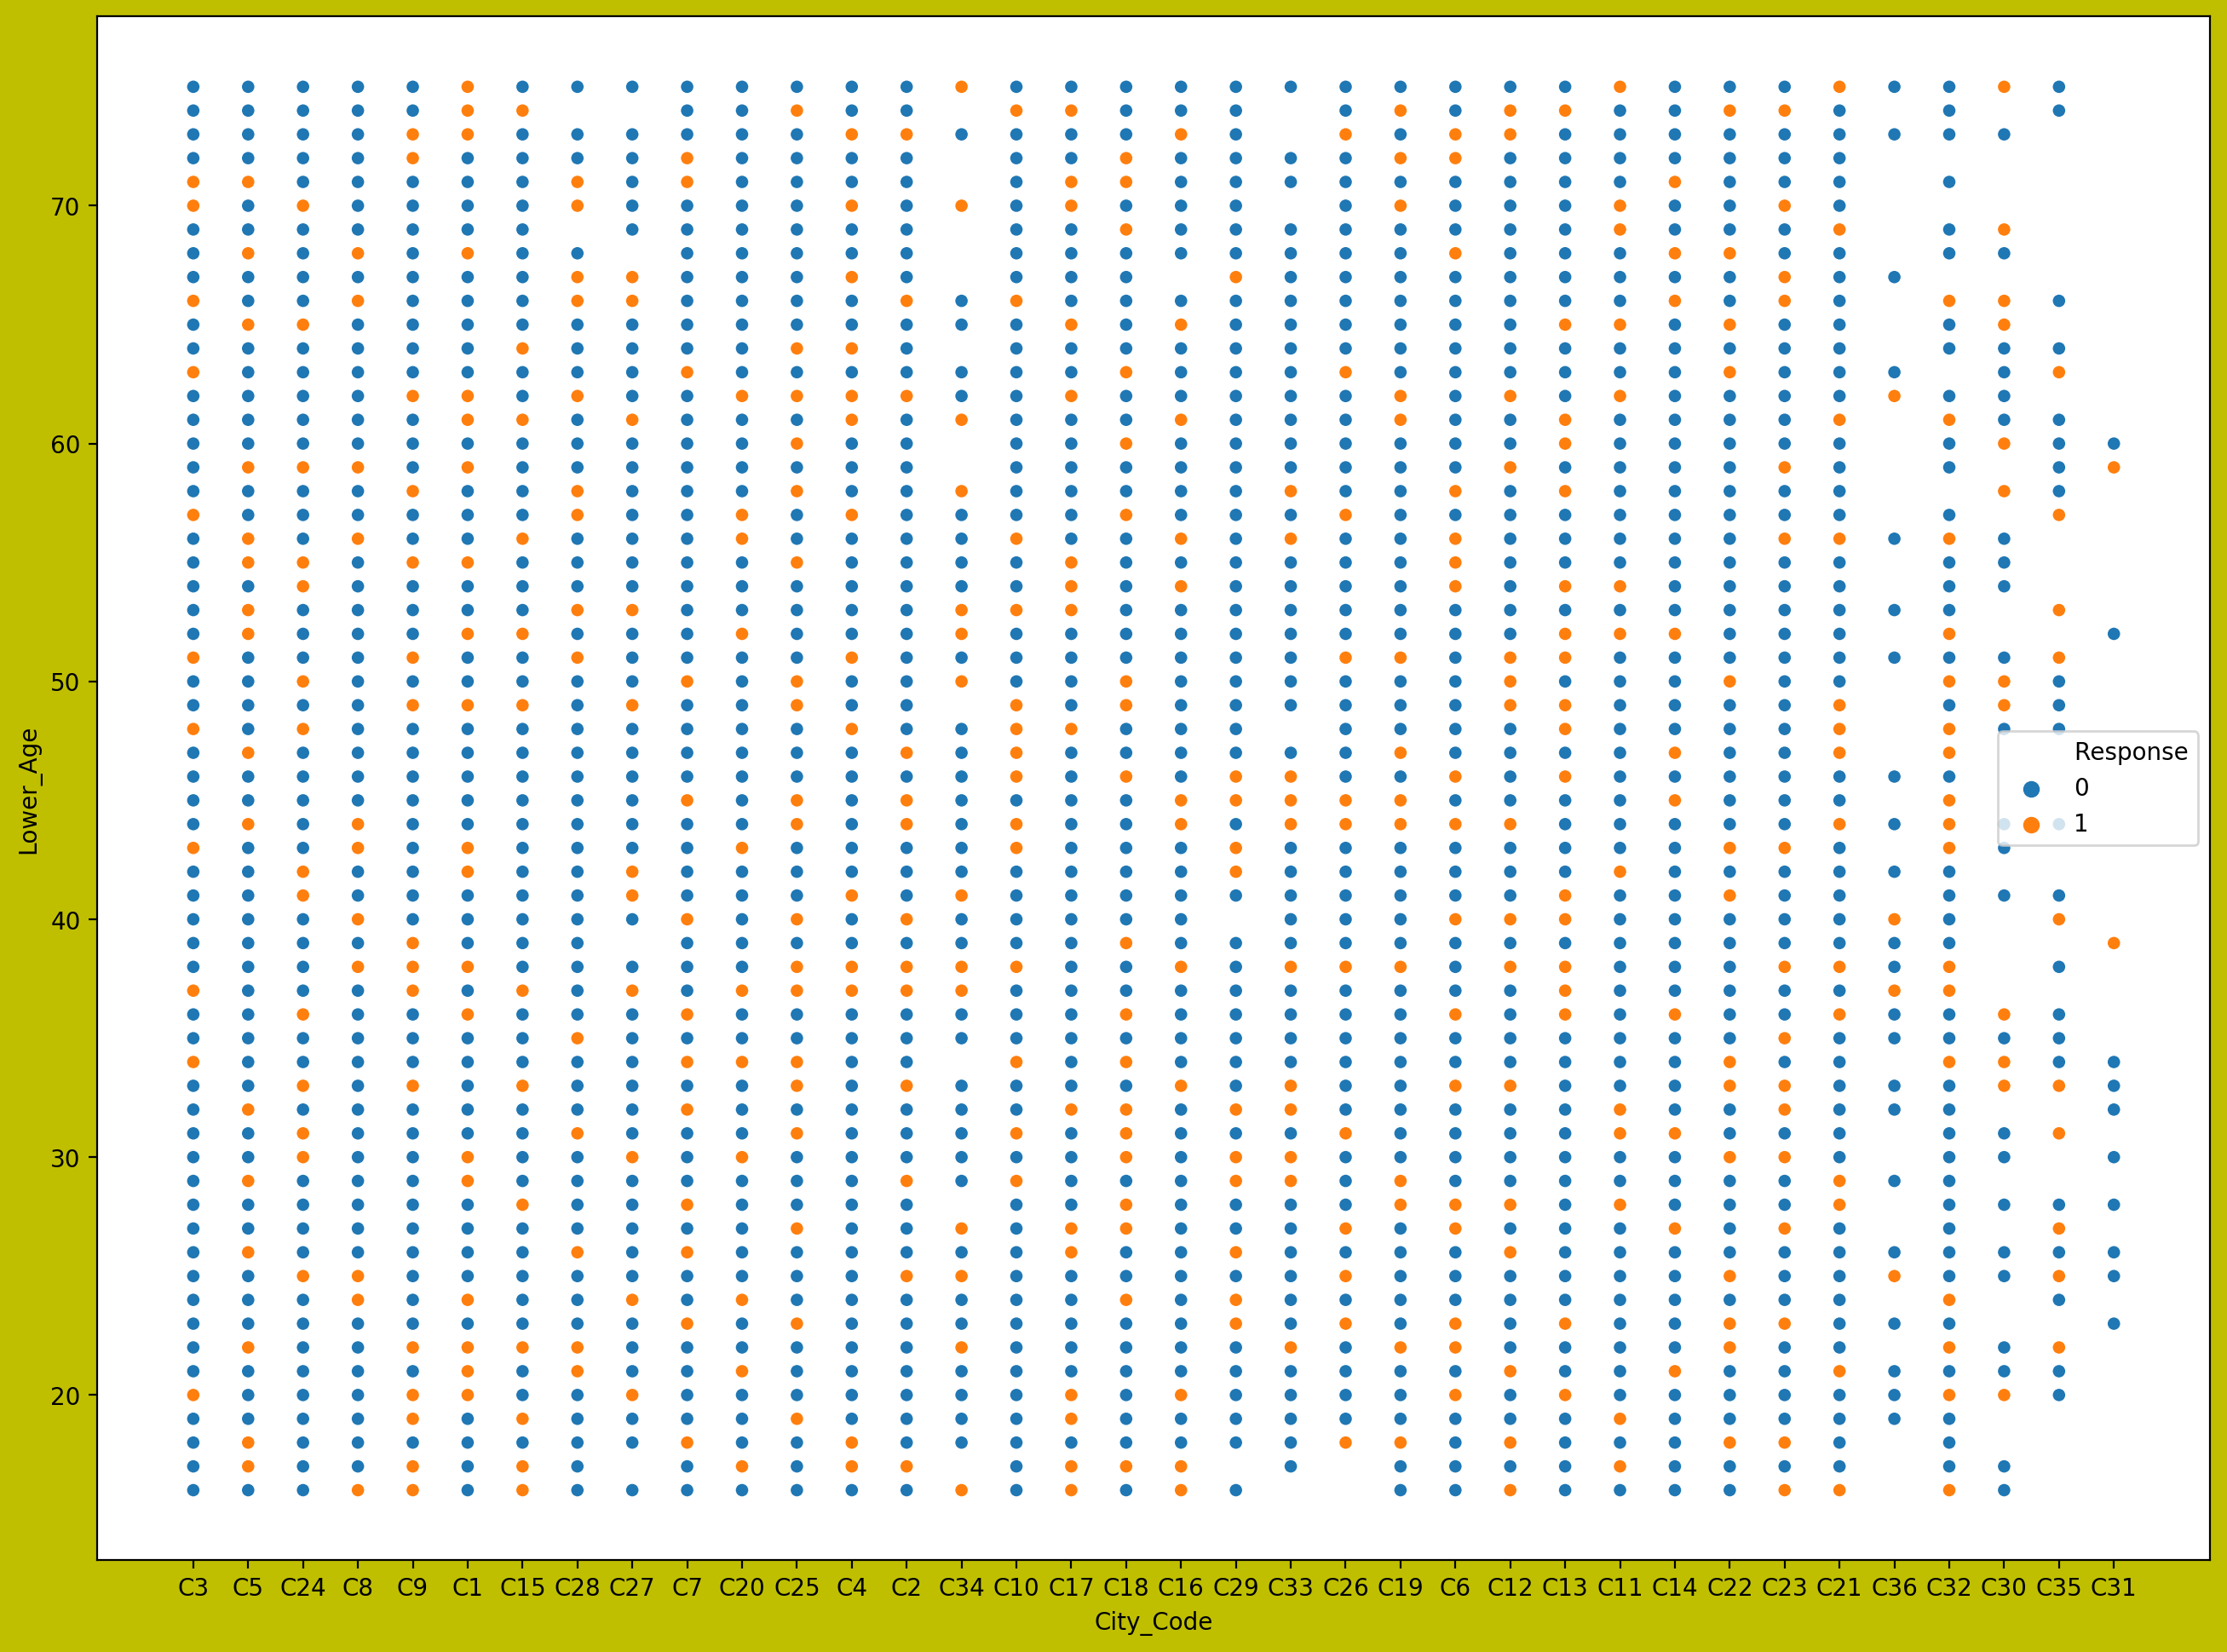

In [47]:
plt.figure(figsize=(16,12),facecolor='y',dpi=200)
sns.scatterplot(df['City_Code'],df['Lower_Age'],hue=df['Response']);

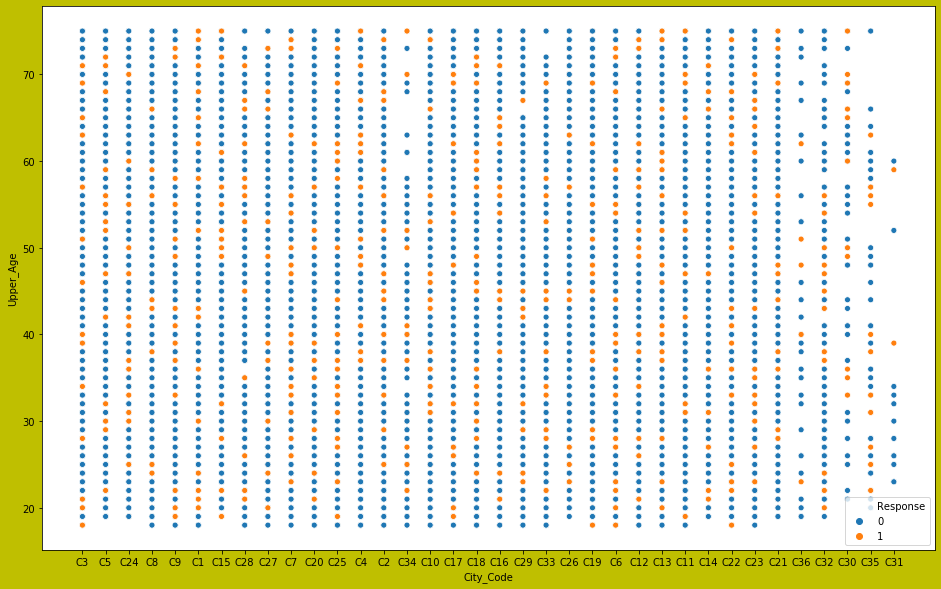

In [48]:
plt.figure(figsize=(16,10),facecolor='y')
sns.scatterplot(df['City_Code'],df['Upper_Age'],hue=df['Response']);

# MultiVariate Analysis

In [49]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

<Figure size 1152x720 with 0 Axes>

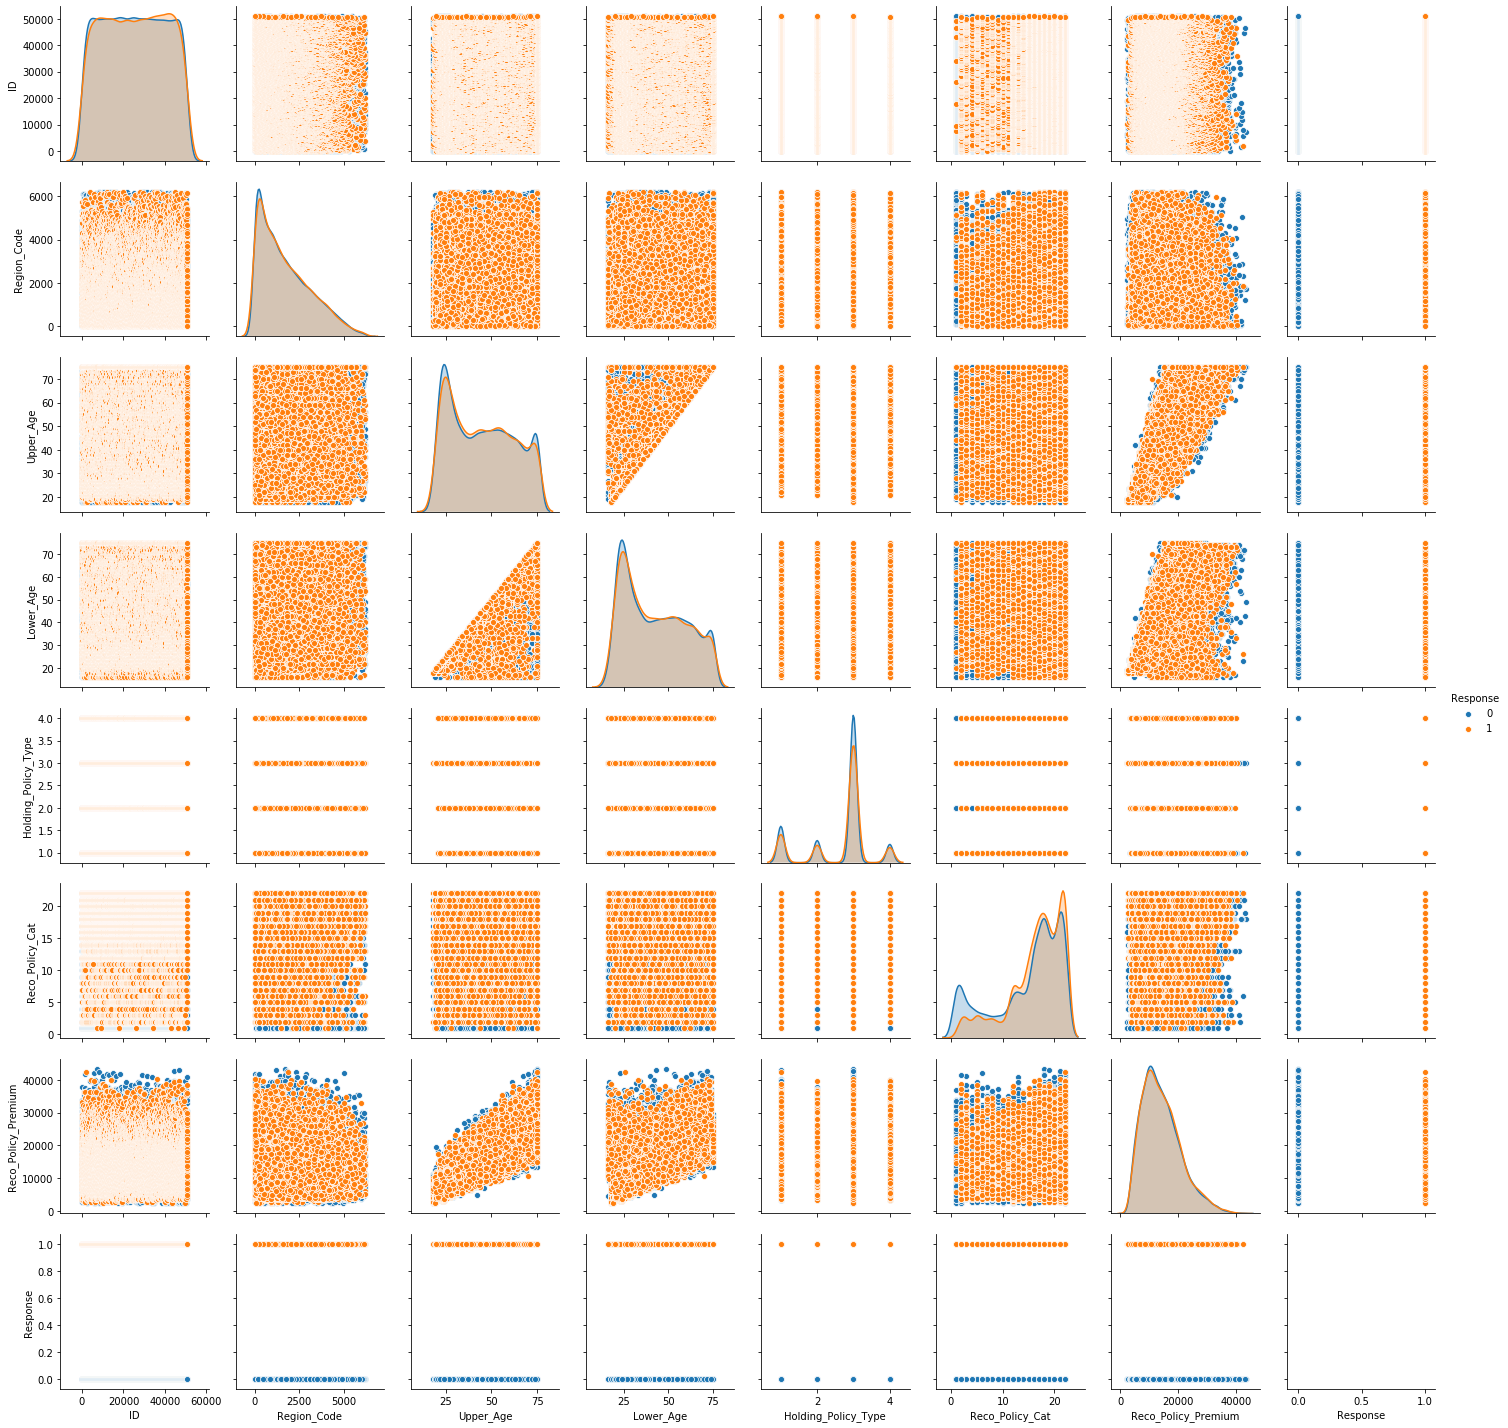

In [50]:
plt.figure(figsize=(16,10),facecolor='y')
sns.pairplot(df,kind='scatter',hue= 'Response')

# Removing Outliers

In [51]:
for i in df['Reco_Policy_Premium']:
    q1 = df['Reco_Policy_Premium'].quantile(0.25)
    q3 = df['Reco_Policy_Premium'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    if i > upper_tail or i < lower_tail:
        df['Reco_Policy_Premium']= df['Reco_Policy_Premium'].replace(i,31000)

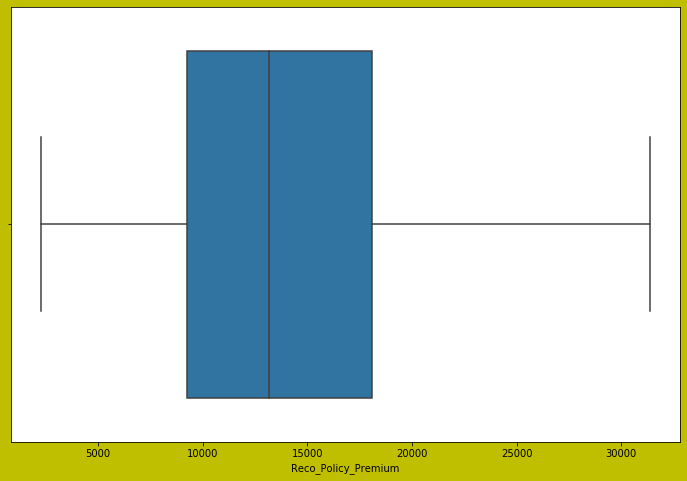

In [52]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Reco_Policy_Premium'],fliersize=5);

In [61]:
for i in df['Region_Code']:
    q1 = df['Region_Code'].quantile(0.25)
    q3 = df['Region_Code'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    if i > upper_tail or i < lower_tail:
        df['Region_Code']= df['Region_Code'].replace(i,5800)

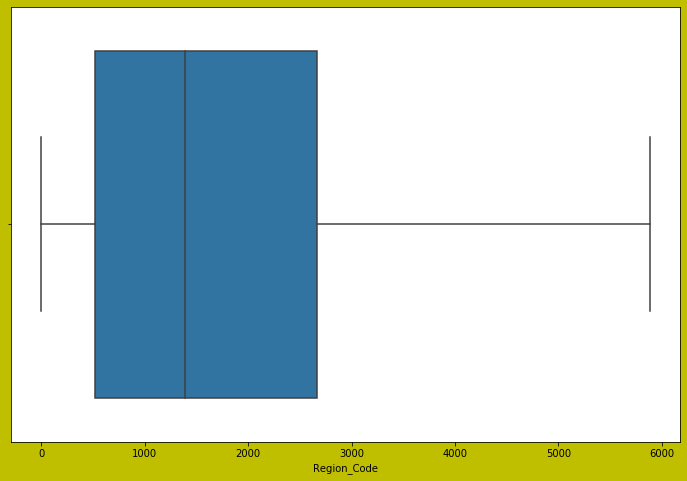

In [63]:
plt.figure(figsize=(12,8),facecolor='y')
sns.boxplot(df['Region_Code'],fliersize=10);

# Converting Categorical variables into Numerical

In [64]:
data = pd.get_dummies(df,drop_first=True)

# Splitting Dependent and Independent Variables

In [70]:
x = data.drop(['Response','ID'],axis=1)

In [71]:
x.shape

(50882, 66)

In [72]:
y = data['Response']

In [73]:
y.shape

(50882,)

In [74]:
x1 = x[0:42209]

In [75]:
x1.shape

(42209, 66)

In [76]:
y1 = y[y==1]

In [77]:
y1.shape

(12209,)

In [78]:
y2 = y[y==0]

In [79]:
y2.shape

(38673,)

In [80]:
y3 = pd.concat([y1,y2[0:30000]])

In [81]:
y3.shape

(42209,)

In [82]:
y3.value_counts()

0    30000
1    12209
Name: Response, dtype: int64

In [83]:
from imblearn.combine import SMOTETomek

In [84]:
smt = SMOTETomek()

In [85]:
X,y = smt.fit_resample(x,y)

# Splitting Data into Train and Test

In [86]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold,StratifiedKFold,RandomizedSearchCV

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=42)

In [88]:
x_train.shape

(51780, 66)

In [89]:
x_test.shape

(17260, 66)

In [90]:
y_train.shape

(51780,)

In [91]:
y_test.shape

(17260,)

# Scaling the Data

In [92]:
sc = StandardScaler()

In [93]:
x_train_scaled= sc.fit_transform(x_train)

In [94]:
x_test_scaled = sc.fit_transform(x_test)

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lr = LogisticRegression()

In [137]:
lr_model = lr.fit(x_train_scaled,y_train)

In [138]:
lr_pred = lr_model.predict(x_test_scaled)

In [326]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,classification_report,RocCurveDisplay,ConfusionMatrixDisplay,PrecisionRecallDisplay,precision_recall_curve,auc,precision_score,recall_score

In [171]:
print("Accuracy of the Logistic Regression model is",(accuracy_score(lr_pred,y_test))*100,'%')

Accuracy of the Logistic Regression model is 77.66512166859792 %


In [141]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      8698
           1       0.80      0.74      0.77      8562

    accuracy                           0.78     17260
   macro avg       0.78      0.78      0.78     17260
weighted avg       0.78      0.78      0.78     17260



In [327]:
precision_score(y_test, lr_pred)

0.7966721290810538

In [328]:
recall_score(y_test, lr_pred)

0.7381452931558047

In [352]:
#y_pred_prob_lr = lr_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_lr)
# Plot ROC curve
#plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC')
#plt.show()

In [353]:
thresholds

array([1.94456716, 0.94456716, 0.91561728, ..., 0.03589321, 0.03409138,
       0.00886797])

# AUC ROC Curve

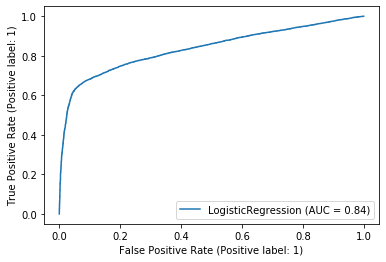

In [164]:
RocCurveDisplay.from_estimator(lr,x_test_scaled,y_test);

In [359]:
print("AUC ROC score of the Logistic Regression model is",(roc_auc_score(y_test,lr_pred)))

AUC ROC score of the Logistic Regression model is 0.7763501816434346


# Confusion Matrix

In [354]:
confusion_matrix(y_test,lr_pred)

array([[7085, 1613],
       [2242, 6320]])

In [355]:
confusion_matrix(lr_pred,y_test)

array([[7085, 2242],
       [1613, 6320]])

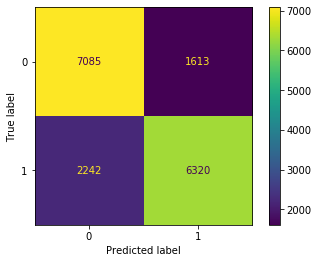

In [358]:
ConfusionMatrixDisplay.from_estimator(lr,x_test_scaled,y_test);

# Precision-Recall Curve

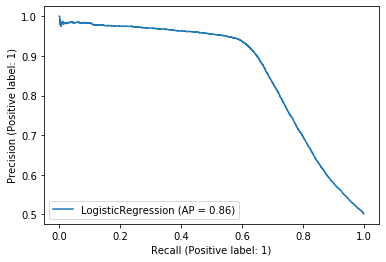

In [145]:
PrecisionRecallDisplay.from_estimator(lr,x_train_scaled,y_train);

In [175]:
precision, recall, thld = precision_recall_curve(y_test, lr_pred)

In [176]:
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision))*100,'%')

AUC ROC score of the Logistic Regression model is 83.23565674336089 %


In [177]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [178]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [179]:
...
# define search
search = GridSearchCV(lr_model, space,scoring='accuracy', n_jobs=-1, cv=cv)

In [180]:
search = GridSearchCV(lr_model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search

In [181]:
result = search.fit(x_train_scaled, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7703424745719069
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


# Building model with best params

In [182]:
lr1 = LogisticRegression(C=0.1,penalty='l2',solver='lbfgs',max_iter=200)

In [183]:
lr_model_best = lr1.fit(x_train_scaled,y_train)

In [184]:
lr_pred_best = lr_model_best.predict(x_test_scaled)

In [185]:
print("Accuracy of the model is",(accuracy_score(lr_pred_best,y_test))*100,'%')

Accuracy of the model is 77.65932792584009 %


In [186]:
print(classification_report(y_test, lr_pred_best))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      8698
           1       0.80      0.74      0.77      8562

    accuracy                           0.78     17260
   macro avg       0.78      0.78      0.78     17260
weighted avg       0.78      0.78      0.78     17260



In [330]:
print(precision_score(y_test, lr_pred_best))
print(recall_score(y_test, lr_pred_best))

0.7964222726127488
0.7383788834384489


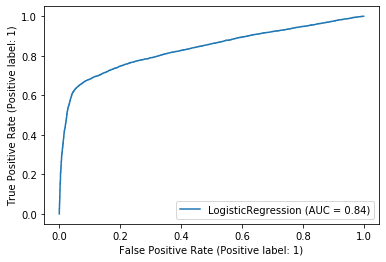

In [191]:
RocCurveDisplay.from_estimator(lr1,x_test_scaled,y_test);

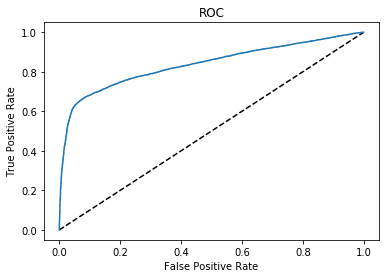

In [342]:
y_pred_prob_lr = lr_model_best.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_lr)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [360]:
print("AUC ROC score of the Logistic Regression model is",(roc_auc_score(y_test,lr_pred_best))*100,'%')

AUC ROC score of the Logistic Regression model is 77.6294523347185 %


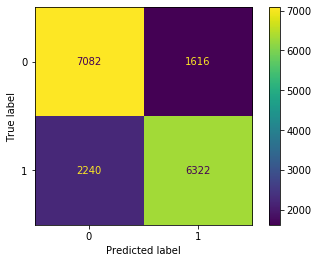

In [193]:
ConfusionMatrixDisplay.from_estimator(lr1,x_test_scaled,y_test)

In [299]:
precision, recall, thld = precision_recall_curve(y_test, lr_pred_best)

In [300]:
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

Precision-Recall score of the Logistic Regression model is 0.8322904969132003


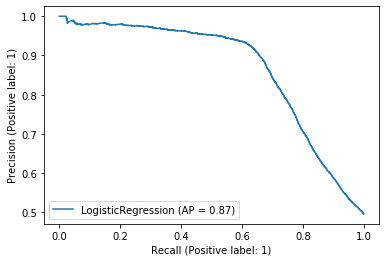

In [320]:
PrecisionRecallDisplay.from_estimator(lr1,x_test_scaled,y_test);

# Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rf = RandomForestClassifier()

In [196]:
rf_model = rf.fit(x_train_scaled,y_train)

In [197]:
rf_pred = rf_model.predict(x_test_scaled)

# Accuracy

In [198]:
print("Accuracy of the model is",(accuracy_score(rf_pred,y_test))*100,'%')

Accuracy of the model is 74.90730011587485 %


# Confusion Matrix

In [199]:
cm =  confusion_matrix(rf_pred,y_test)
cm

array([[6020, 1653],
       [2678, 6909]])

# AUC ROC Curve

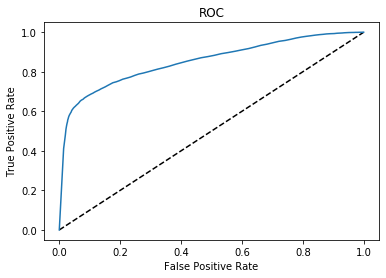

In [200]:
y_pred_prob_rf = rf_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_rf)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [201]:
print("AUC-ROC Score of the model is",roc_auc_score(rf_pred,y_test))

AUC-ROC Score of the model is 0.7526163336083929


In [202]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.74      8698
           1       0.72      0.81      0.76      8562

    accuracy                           0.75     17260
   macro avg       0.75      0.75      0.75     17260
weighted avg       0.75      0.75      0.75     17260



In [331]:
print(precision_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))

0.7206633983519349
0.806937631394534


In [301]:
precision, recall, thld = precision_recall_curve(y_test, rf_pred)

In [302]:
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

Precision-Recall score of the Logistic Regression model is 0.8116857987666296


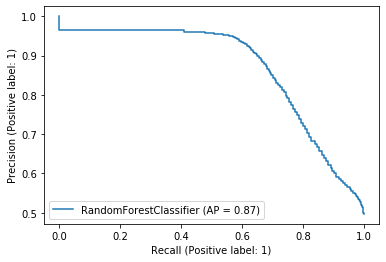

In [321]:
PrecisionRecallDisplay.from_estimator(rf,x_test_scaled,y_test);

In [206]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

In [207]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [208]:
grid_search.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [209]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [210]:
grid_search.best_score_

0.7940517574353031

In [211]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [213]:
rf1 = RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [214]:
rf_model1 = rf1.fit(x_train_scaled,y_train)

In [215]:
rf_pred1 = rf_model1.predict(x_test_scaled)

In [216]:
print("Accuracy of the model is",(accuracy_score(rf_pred1,y_test))*100,'%')

Accuracy of the model is 78.42410196987254 %


In [217]:
confusion_matrix(rf_pred1,y_test)

array([[7291, 2317],
       [1407, 6245]])

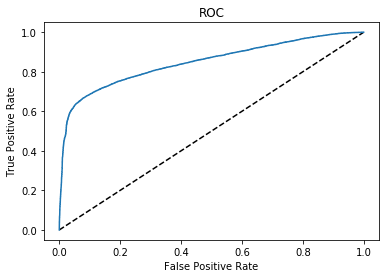

In [218]:
y_pred_prob_rf1 = rf_model1.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_rf1)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [303]:
precision, recall, thld = precision_recall_curve(y_test, rf_pred1)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

Precision-Recall score of the Logistic Regression model is 0.8398765900652182


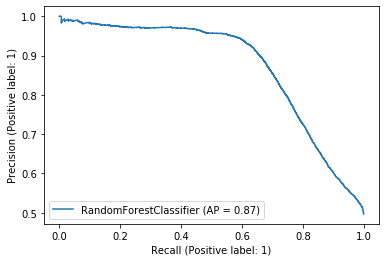

In [322]:
PrecisionRecallDisplay.from_estimator(rf1,x_test_scaled,y_test);

In [219]:
print(classification_report(y_test, rf_pred1))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      8698
           1       0.82      0.73      0.77      8562

    accuracy                           0.78     17260
   macro avg       0.79      0.78      0.78     17260
weighted avg       0.79      0.78      0.78     17260



In [332]:
print(precision_score(y_test, rf_pred1))
print(recall_score(y_test, rf_pred1))

0.8161265028750654
0.7293856575566456


# Boosting and Bagging Techniques

In [220]:
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
gb = GradientBoostingClassifier()

In [222]:
gb_model = gb.fit(x_train_scaled,y_train)

In [223]:
gb_pred = gb_model.predict(x_test_scaled)

In [224]:
print("Accuracy of the model is",(accuracy_score(gb_pred,y_test))*100,'%')

Accuracy of the model is 57.925840092699886 %


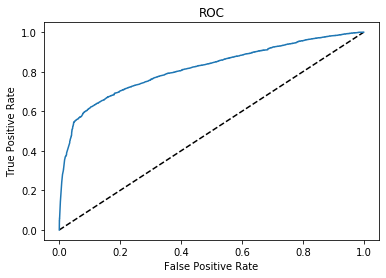

In [225]:
y_pred_prob_gb = gb_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_gb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [305]:
print("AUC-ROC Score of the model is",roc_auc_score(gb_pred,y_test))

AUC-ROC Score of the model is 0.6837503801951041


In [304]:
precision, recall, thld = precision_recall_curve(y_test, gb_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

Precision-Recall score of the Logistic Regression model is 0.760152600039033


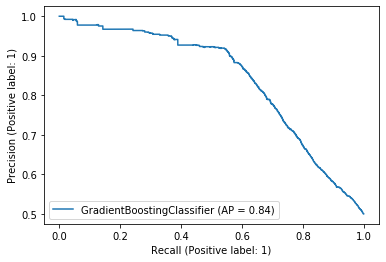

In [323]:
PrecisionRecallDisplay.from_estimator(gb,x_test_scaled,y_test);

In [226]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.82      0.21      0.33      8698
           1       0.54      0.95      0.69      8562

    accuracy                           0.58     17260
   macro avg       0.68      0.58      0.51     17260
weighted avg       0.68      0.58      0.51     17260



In [333]:
print(precision_score(y_test, gb_pred))
print(recall_score(y_test, gb_pred))

0.543200850724445
0.9545666900256949


In [227]:
param_test1 = {'n_estimators':range(20,81,10)}

In [244]:
gs = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.001, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)

In [245]:
gs.fit(x_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.001,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='accuracy')

In [246]:
gs_pred = gs.predict(x_test_scaled)

In [247]:
print("Accuracy of the model is",(accuracy_score(gs_pred,y_test))*100,'%')

Accuracy of the model is 69.02665121668598 %


In [248]:
confusion_matrix(gs_pred,y_test)

array([[4869, 1517],
       [3829, 7045]])

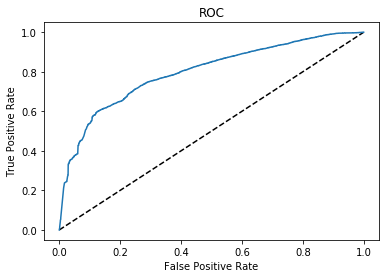

In [249]:
y_pred_prob_gs = gs.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_gs)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [250]:
print(classification_report(y_test, gs_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.65      8698
           1       0.65      0.82      0.72      8562

    accuracy                           0.69     17260
   macro avg       0.71      0.69      0.69     17260
weighted avg       0.71      0.69      0.68     17260



In [334]:
print(precision_score(y_test, gs_pred))
print(recall_score(y_test, gs_pred))

0.647875666727975
0.8228217706143425


In [251]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier

In [252]:
ada = AdaBoostClassifier()

In [253]:
ada_model = ada.fit(x_train_scaled,y_train)

In [254]:
ada_pred = ada_model.predict(x_test_scaled)

In [255]:
print("Accuracy of the model is",(accuracy_score(ada_pred,y_test))*100,'%')

Accuracy of the model is 60.65469293163383 %


In [256]:
confusion_matrix(ada_pred,y_test)

array([[2523,  616],
       [6175, 7946]])

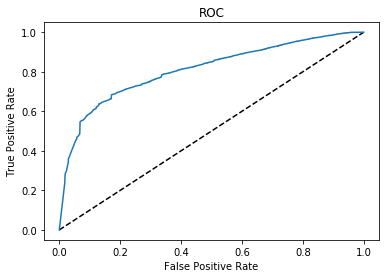

In [257]:
y_pred_prob_ada = ada_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_ada)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [306]:
print("AUC-ROC Score of the model is",roc_auc_score(gb_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, gb_pred) 
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.6837503801951041
Precision-Recall score of the Logistic Regression model is 0.760152600039033


In [258]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.80      0.29      0.43      8698
           1       0.56      0.93      0.70      8562

    accuracy                           0.61     17260
   macro avg       0.68      0.61      0.56     17260
weighted avg       0.68      0.61      0.56     17260



In [335]:
print(precision_score(y_test, ada_pred))
print(recall_score(y_test, ada_pred))

0.5627080235110827
0.9280541929455735


In [259]:
bag = BaggingClassifier()

In [260]:
bag_model = bag.fit(x_train_scaled,y_train)

In [261]:
bag_pred = bag_model.predict(x_test_scaled)

In [262]:
print("Accuracy of the model is",(accuracy_score(bag_pred,y_test))*100,'%')

Accuracy of the model is 70.85747392815759 %


In [263]:
confusion_matrix(bag_pred,y_test)

array([[5207, 1539],
       [3491, 7023]])

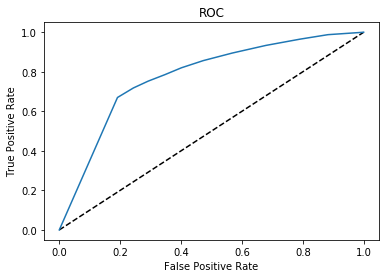

In [264]:
y_pred_prob_bag = bag_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_bag)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [307]:
print("AUC-ROC Score of the model is",roc_auc_score(bag_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, bag_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.7199156648024705
Precision-Recall score of the Logistic Regression model is 0.7886922496887498


In [265]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67      8698
           1       0.67      0.82      0.74      8562

    accuracy                           0.71     17260
   macro avg       0.72      0.71      0.71     17260
weighted avg       0.72      0.71      0.71     17260



In [336]:
print(precision_score(y_test, bag_pred))
print(recall_score(y_test, bag_pred))

0.6679665208293704
0.8202522775052558


In [266]:
ec = ExtraTreesClassifier()

In [267]:
ec_model = ec.fit(x_train_scaled,y_train)

In [268]:
ec_pred = ec_model.predict(x_test_scaled)

In [269]:
print("Accuracy of the model is",(accuracy_score(ec_pred,y_test))*100,'%')

Accuracy of the model is 79.42062572421784 %


In [270]:
confusion_matrix(ec_pred,y_test)

array([[7517, 2371],
       [1181, 6191]])

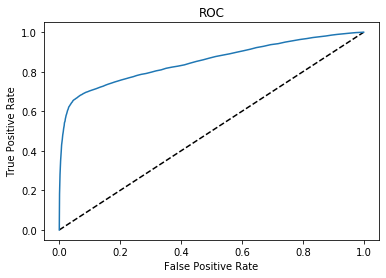

In [271]:
y_pred_prob_ec = ec_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_ec)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [308]:
print("AUC-ROC Score of the model is",roc_auc_score(ec_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, ec_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.800006820831731
Precision-Recall score of the Logistic Regression model is 0.8501238005410818


In [272]:
print(classification_report(y_test, ec_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      8698
           1       0.84      0.72      0.78      8562

    accuracy                           0.79     17260
   macro avg       0.80      0.79      0.79     17260
weighted avg       0.80      0.79      0.79     17260



In [337]:
print(precision_score(y_test, ec_pred))
print(recall_score(y_test, ec_pred))

0.8397992403689637
0.7230787199252511


In [273]:
from sklearn.svm import SVC

In [344]:
svc = SVC(probability=True)

In [345]:
svc_model = svc.fit(x_train_scaled,y_train)

In [346]:
svc_pred = svc_model.predict(x_test_scaled)

In [347]:
print("Accuracy of the model is",(accuracy_score(svc_pred,y_test))*100,'%')

Accuracy of the model is 79.46697566628042 %


In [348]:
confusion_matrix(svc_pred,y_test)

array([[8099, 2945],
       [ 599, 5617]])

In [349]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      8698
           1       0.90      0.66      0.76      8562

    accuracy                           0.79     17260
   macro avg       0.82      0.79      0.79     17260
weighted avg       0.82      0.79      0.79     17260



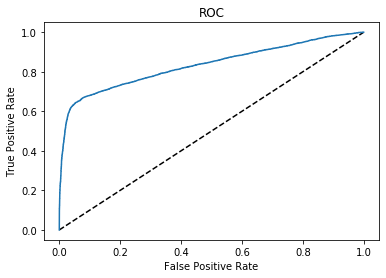

In [350]:
y_pred_prob_svc = svc_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_svc)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [338]:
print(precision_score(y_test, svc_pred))
print(recall_score(y_test, svc_pred))

0.9036357786357786
0.6560383088063536


In [309]:
print("AUC-ROC Score of the model is",roc_auc_score(svc_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, svc_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.8184875742146658
Precision-Recall score of the Logistic Regression model is 0.8651499058299884


In [1]:
param_grid = {'C': [0.1, 1], 'gamma': [1,0.1],'kernel': ['linear','rbf', 'poly', 'sigmoid'],'degree':[0, 1, 2]}

In [2]:
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)

NameError: name 'GridSearchCV' is not defined

In [ ]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] END ............C=0.1, degree=0, gamma=1, kernel=linear; total time=11.4min
[CV] END ............C=0.1, degree=0, gamma=1, kernel=linear; total time=11.5min
[CV] END ............C=0.1, degree=0, gamma=1, kernel=linear; total time=11.5min
[CV] END ............C=0.1, degree=0, gamma=1, kernel=linear; total time=11.3min
[CV] END ............C=0.1, degree=0, gamma=1, kernel=linear; total time=11.4min
[CV] END ...............C=0.1, degree=0, gamma=1, kernel=rbf; total time=49.3min
[CV] END ...............C=0.1, degree=0, gamma=1, kernel=rbf; total time=48.9min
[CV] END ...............C=0.1, degree=0, gamma=1, kernel=rbf; total time=49.6min
[CV] END ...............C=0.1, degree=0, gamma=1, kernel=rbf; total time=48.1min
[CV] END ...............C=0.1, degree=0, gamma=1, kernel=rbf; total time=48.5min
[CV] END ..............C=0.1, degree=0, gamma=1, kernel=poly; total time=20.1min
[CV] END ..............C=0.1, degree=0, gamma

[CV] END ..........C=0.1, degree=1, gamma=0.1, kernel=linear; total time=11.4min
[CV] END ..........C=0.1, degree=1, gamma=0.1, kernel=linear; total time=11.5min
[CV] END ..........C=0.1, degree=1, gamma=0.1, kernel=linear; total time=11.2min
[CV] END ..........C=0.1, degree=1, gamma=0.1, kernel=linear; total time=11.3min
[CV] END .............C=0.1, degree=1, gamma=0.1, kernel=rbf; total time=29.2min
[CV] END .............C=0.1, degree=1, gamma=0.1, kernel=rbf; total time=27.7min
[CV] END .............C=0.1, degree=1, gamma=0.1, kernel=rbf; total time=28.9min
[CV] END .............C=0.1, degree=1, gamma=0.1, kernel=rbf; total time=30.4min
[CV] END .............C=0.1, degree=1, gamma=0.1, kernel=rbf; total time=30.3min
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=10.1min
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=10.3min
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=10.1min
[CV] END ............C=0.1, 

In [280]:
from sklearn.neighbors import KNeighborsClassifier

In [281]:
knn = KNeighborsClassifier(p = 1,n_jobs=-1)

In [282]:
knn_model = knn.fit(x_train_scaled,y_train)

In [283]:
knn_pred = knn_model.predict(x_test_scaled)

In [284]:
print("Accuracy of the model is",(accuracy_score(knn_pred,y_test))*100,'%')

Accuracy of the model is 77.58980301274624 %


In [285]:
confusion_matrix(knn_pred,y_test)

array([[7225, 2395],
       [1473, 6167]])

In [310]:
print("AUC-ROC Score of the model is",roc_auc_score(knn_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, knn_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.7791192269595411
Precision-Recall score of the Logistic Regression model is 0.8331173642314638


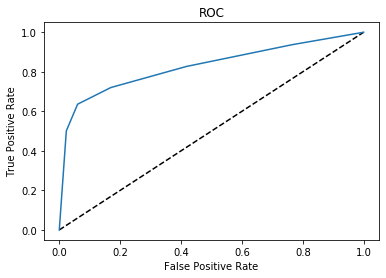

In [311]:
y_pred_prob_knn = knn_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_knn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [288]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      8698
           1       0.81      0.72      0.76      8562

    accuracy                           0.78     17260
   macro avg       0.78      0.78      0.78     17260
weighted avg       0.78      0.78      0.78     17260



In [339]:
print(precision_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))

0.8071989528795811
0.7202756365335202


In [289]:
from sklearn.naive_bayes import GaussianNB

In [290]:
gnb= GaussianNB()

In [291]:
gnb_model = gnb.fit(x_train_scaled,y_train)

In [292]:
gnb_pred = gnb_model.predict(x_test_scaled)

In [293]:
print("Accuracy of the model is",(accuracy_score(gnb_pred,y_test))*100,'%')

Accuracy of the model is 69.26419466975666 %


In [294]:
confusion_matrix(gnb_pred,y_test)

array([[4918, 1525],
       [3780, 7037]])

In [324]:
print("AUC-ROC Score of the model is",roc_auc_score(gnb_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, gnb_pred)
print("Precision-Recall score of the Logistic Regression model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.706929538814506
Precision-Recall score of the Logistic Regression model is 0.7803960233155711


In [295]:
print(classification_report(gnb_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      6443
           1       0.82      0.65      0.73     10817

    accuracy                           0.69     17260
   macro avg       0.69      0.71      0.69     17260
weighted avg       0.73      0.69      0.70     17260



In [340]:
print(precision_score(y_test, gnb_pred))
print(recall_score(y_test, gnb_pred))

0.6505500600905981
0.8218874094837655


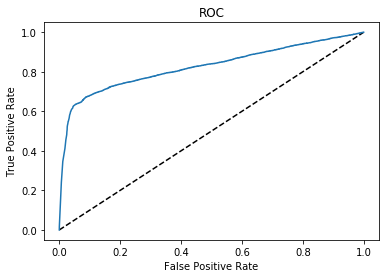

In [296]:
y_pred_prob_gnb = gnb_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_gnb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [312]:
from sklearn.neural_network import MLPClassifier

In [313]:
mlp = MLPClassifier(max_iter=100)

In [314]:
mlp_model = mlp.fit(x_train_scaled,y_train)

/home/scypyuser/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [315]:
mlp_pred = mlp_model.predict(x_test_scaled)

In [316]:
print("Accuracy of the model is",(accuracy_score(mlp_pred,y_test))*100,'%')

Accuracy of the model is 78.96292004634994 %


In [317]:
confusion_matrix(mlp_pred,y_test)

array([[7603, 2536],
       [1095, 6026]])

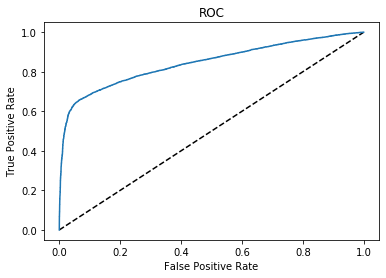

In [351]:
y_pred_prob_mlp = mlp_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_mlp)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [318]:
print(classification_report(mlp_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81     10139
           1       0.70      0.85      0.77      7121

    accuracy                           0.79     17260
   macro avg       0.79      0.80      0.79     17260
weighted avg       0.80      0.79      0.79     17260



In [341]:
print(precision_score(y_test, mlp_pred))
print(recall_score(y_test, mlp_pred))

0.8462294621541918
0.7038075216071011


In [325]:
print("AUC-ROC Score of the MLP Classifier model is",roc_auc_score(mlp_pred,y_test))
precision, recall, thld = precision_recall_curve(y_test, mlp_pred)
print("Precision-Recall score of the MLP Classifier model is",(auc(recall,precision)))

AUC-ROC Score of the model is 0.798053087917021
Precision-Recall score of the Logistic Regression model is 0.8484831500498238


In [361]:
parameter_space = {
    'hidden_layer_sizes': [(20,20,20), (20,50,200), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [362]:
mlp_gd= GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=3,verbose=1)

In [363]:
mlp_gd.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/scypyuser/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(20, 20, 20), (20, 50, 200),
                                                (50,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [364]:
mlp_gd.best_estimator_

MLPClassifier(alpha=0.05, hidden_layer_sizes=(20, 50, 200),
              learning_rate='adaptive', max_iter=100, solver='sgd')

In [365]:
mlp_gd.best_score_

0.7924101969872538

In [366]:
mlp_gd.predict(x_test_scaled)

array([0, 1, 0, ..., 1, 0, 1])

In [367]:
accuracy_score(mlp_gd.predict(x_test_scaled),y_test)

0.8002317497103129

In [368]:
print("AUC-ROC Score of the MLP Classifier model is",roc_auc_score(mlp_gd.predict(x_test_scaled),y_test))
precision, recall, thld = precision_recall_curve(y_test, mlp_gd.predict(x_test_scaled))
print("Precision-Recall score of the MLP Classifier model is",(auc(recall,precision)))

AUC-ROC Score of the MLP Classifier model is 0.8196324104152775
Precision-Recall score of the MLP Classifier model is 0.8664048321595373


In [369]:
print(precision_score(y_test, mlp_gd.predict(x_test_scaled)))
print(recall_score(y_test, mlp_gd.predict(x_test_scaled)))

0.8964341085271318
0.6753095071245037


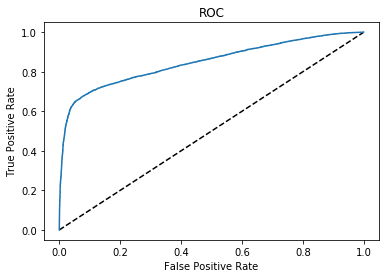

In [370]:
y_pred_prob_mlp1 = mlp_gd.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_mlp1)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [380]:
from sklearn.pipeline import Pipeline

In [381]:
from sklearn.neural_network import BernoulliRBM

In [470]:
rbm = BernoulliRBM(learning_rate = 0.0001,n_iter = 10,n_components = 250,random_state=0, verbose=True)

In [471]:
logistic =LogisticRegression(solver="lbfgs",penalty='l2',C=0.4)

In [472]:
rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

In [473]:
rbm_features_classifier.fit(x_train_scaled,y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -65.45, time = 1.93s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -85.09, time = 3.12s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -102.69, time = 3.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -120.97, time = 3.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -140.28, time = 3.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -160.32, time = 3.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -180.52, time = 2.98s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -200.14, time = 2.98s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -218.65, time = 2.95s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -235.89, time = 3.01s


/home/scypyuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.0001, n_components=250,
                              random_state=0, verbose=True)),
                ('logistic', LogisticRegression(C=0.4))])

In [474]:
rbm_features_classifier.predict(x_test_scaled)

array([0, 1, 0, ..., 1, 0, 1])

In [478]:
print("AUC-ROC Score of the RBM+LR Classifier model is",roc_auc_score(y_test,rbm_features_classifier.predict(x_test_scaled)))
precision, recall, thld = precision_recall_curve(y_test, rbm_features_classifier.predict(x_test_scaled))
print("Precision-Recall score of the RBM+LR Classifier model is",(auc(recall,precision)))

AUC-ROC Score of the RBM+LR Classifier model is 0.737708701154776
Precision-Recall score of the RBM+LR Classifier model is 0.8011639381664595


In [476]:
accuracy_score(y_test,rbm_features_classifier.predict(x_test_scaled))

0.7377752027809965